In [2]:
%pylab
%matplotlib inline
import scipy.special as sp
from mpl_toolkits.mplot3d import Axes3D

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [7]:
T = arange(100)
B = arange(100)
sp.jv(0,4) # <- Bessel function warping term
tw=0 #16 # <- Determines how warped
Freq=20 # <- Fermi Surface frequency of first pocket: use 531T for YBCO
m=0.02 # <-Quasiparticle mass of first pocket: use 1.34 m_e for YBCO

m2 = .06
Freq2 = 40

def sech(x):
    return cosh(x)**(-1)
# sympy.sech = sech

def csch(x):
    return sinh(x)**(-1)
# sympy.csch = csch

def coth(x):
    return tanh(x)**(-1)
# sympy.coth = coth
sp.jv(0,3)

# tanh(2)


-0.2600519549019335

This is the equation to determine the behavior of quantum oscillations in specific heat. There are three things to note about this equation.

1. When T=0, C$_{oscillatory}$ = 0. This is because at zero temperature there is zero electronic specific heat. So the amplitude of the quantum oscillations is zero at zero temperature.

2. It has a second derivative of the FFT of the FD distribution. This means there will be a node (phase shift) that depends only on the quasiparticle effective mass, m$^*$. It may help to think of the node as when the maximum density of states in the system goes from being between two Landau levels to being centered on the Landau level.

3. the quasiparticle effective mass is defined to be a linear function of magnetic field m$^*$ = m$^{*}_{H=0}$ + .01(H). The 0.01$m_e$ value and m$^*$=0.04$m_e$ value above are choosen to reflect experimental data for the proposed Weyl semi-metal As (as is the cyclotron frequency of 20T). The mass is linear in field because the increase in mass with field in this model comes from Zeeman, $g \mu H$. To see what happens in the normal case just set m$^*$ = m$^{*}_{H=0}$

In [8]:
#Using two FS for the calculation (attempting to model NaP,NaAs,TaP,TaAs,Cd3As2 type of materials)

def fun(t,b,p):
    return -t*sp.jv(0, 4*(m + .01*b)*pi*p*tw/b)*cos(2*pi*p*(Freq/b-1/2))*(csch(14.7*(m + .01*b)*p*t/b)*(-2*coth(14.7*(m+.01*b)*p*t/b) + 14.7*(m+.01*b)*p*t/b*coth(14.7*(m+.01*b)*p*t/b)**2 + 14.7*(m+.01*b)*p*t/b*csch(14.7*(m+.01*b)*p*t/b)**2))  -t*sp.jv(0, 4*(m2 + .01*b)*pi*p*tw/b)*cos(2*pi*p*(Freq2/b-1/2))*(csch(14.7*(m2 + .01*b)*p*t/b)*(-2*coth(14.7*(m2+.01*b)*p*t/b) + 14.7*(m2+.01*b)*p*t/b*coth(14.7*(m2+.01*b)*p*t/b)**2 + 14.7*(m2+.01*b)*p*t/b*csch(14.7*(m2+.01*b)*p*t/b)**2))

In [9]:
# z=fun(T,B)
# Axes3D.plot_surface(B,T,z)


C:\Users\scr\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in sinh


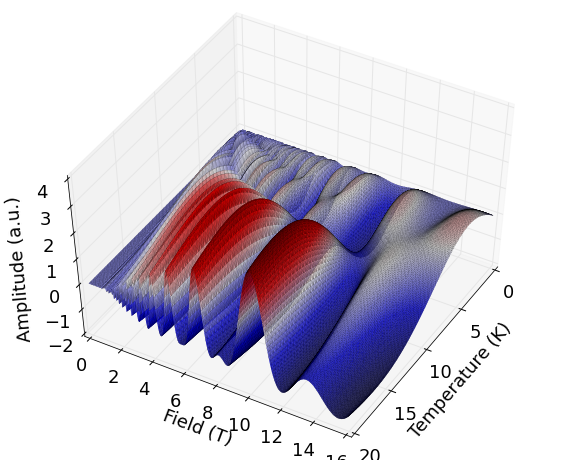

In [10]:
fig = plt.figure(figsize=(10,8))


ax = fig.add_subplot(111, projection='3d')
B = np.arange(0.05, 16, 0.05)
T = np.arange(20,0,-.1)
X, Y = np.meshgrid(T, B)
j=ravel(X)
q=ravel(Y)

zs1 = np.array([fun(T,B,1) for T,B in zip(np.ravel(X), np.ravel(Y))])
zs2 = np.array([fun(T,B,1)+fun(T,B,2) for T,B in zip(np.ravel(X), np.ravel(Y))])


ax.plot_trisurf(j,q,zs1,cmap=cm.seismic, linewidth=0.1, shade = True,edgecolor="black")

#ax.set_xticks(array([0,2,4,6]))
#ax.set_yticks(array([20,26,32,38,44]))
#ax.set_zticks(array([-0.1,0,0.1,0.2]))
#ax.set_xlim3d(0,6)
#ax.set_ylim3d(20,44)

ax.zaxis.set_rotate_label(False)  # disable automatic rotation

ax.set_xlabel('Temperature (K)',fontsize=18)
ax.set_ylabel('Field (T)',fontsize=18)
ax.set_zlabel('Amplitude (a.u.)',fontsize=18,rotation=95)

plt.tick_params(axis='both', which='major', labelsize=18)
ax.azim = 30
ax.elev = 50
plt.show()



### ----- Ignore rest of code , just playing around with different cuts ----

In [24]:
plt.savefig("quantum oscillation with p=1 m=1.34.pdf",bbox_inches="tight",transparent=True)



In [6]:
fig = plt.figure(figsize=(10,8))


ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(j,q,zs2,cmap=cm.seismic, linewidth=0.1, shade = True,edgecolor="black")


ax.set_xticks(array([0,2,4,6]))
ax.set_yticks(array([20,26,32,38,44]))
ax.set_zticks(array([-0.1,0,0.1,0.2]))
ax.set_xlim3d(0,6)
ax.set_ylim3d(20,44)
plt.tick_params(axis='both', which='major', labelsize=18)

ax.zaxis.set_rotate_label(False)  # disable automatic rotation

ax.set_xlabel('Temperature (K)',fontsize=18)
ax.set_ylabel('Field (T)',fontsize=18)
ax.set_zlabel('Amplitude (a.u.)',fontsize=18,rotation=95)


ax.azim = 30
ax.elev = 50
plt.show()



In [12]:
plt.savefig("quantum oscillation with p=1+2 m=1.34.pdf",bbox_inches="tight",transparent=True)



In [5]:
B = np.arange(44, 30, -0.05)
fig,ax = plt.subplots(figsize=(6,4))
plot(B,fun(1,B,1))
plot(B,fun(2,B,1))
plot(B,fun(3,B,1))
plot(B,fun(5.5,B,1))
plt.legend({"1K","2K","3K","5K"})
ax.set_xlabel('Temperature (K)',fontsize=18)
ax.set_ylabel('Amplitude (a.u.)',fontsize=18)



# plot(B,0.5*fun(3,B,1)+0.5*fun(3,B,2))

In [60]:
1.38*2*pi*pi*2*pi*3*9.1/(6.63*1.6)

440.4715187230825

In [7]:
B = np.arange(50, 30, -0.05)
fig,ax = plt.subplots(figsize=(6,4))
plot(B,fun(1,B,1)+fun(1,B,2))
plot(B,fun(2,B,1)+fun(2,B,2))

plot(B,fun(3,B,1)+fun(3,B,2))

plot(B,fun(5.5,B,1)+fun(5.5,B,2))
# ax.set_xlabel('Temperature (K)',fontsize=18)
# ax.set_ylabel('Amplitude (a.u.)',fontsize=18)





plt.legend({"1K","2K","3K","5K"})
# plot(B,0.5*fun(3,B,1)+0.5*fun(3,B,2))

In [83]:
B = np.arange(50, 30, -0.05)
fig,ax = plt.subplots(figsize=(6,4))

k1=plot(B,fun(1,B,1),'r');
k2=plot(B,fun(2,B,1),color='b');
k3=plot(B,fun(3,B,1),color='g');
k5=plot(B,fun(5.5,B,1),color='grey');
plt.legend(("1K","2K","3K","5.5K"),frameon=False)

plt.tick_params(axis='both', which='major', labelsize=15)

plt.ylabel('Amplitude (a.u.)',fontsize=22,labelpad=30)
plt.xlabel('Field(T)',fontsize=15,labelpad=30)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))  #for the minor ticks, use no labels; default NullFormatter

plt.xlim((30,50))

ax.yaxis.set_major_locator(MultipleLocator(0.2))
# ax.yaxis.set_major_formatter(FormatStrFormatter('%f'))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.ylim((-0.3,0.3))
plt.savefig("fit to data p=1.pdf",bbox_inches="tight",transparent=True)



In [8]:
B = np.arange(50, 30, -0.05)
fig,ax = plt.subplots(figsize=(5,4))
mylegend={""}
for k in range (0,5):
# k1=plot(B,(fun(1,B,1)+k*fun(1,B,2))/sqrt(1+k**2),'r');
# k2=plot(B,fun(2,B,1)+k*fun(2,B,2),color='b');
# k3=plot(B,fun(3,B,1)+k*fun(3,B,2),color='g');
    k5=plot(B,(fun(5.5,B,1)+k*fun(5.5,B,2))/sqrt(1+k**2),label="k="+str(k));
plt.legend(frameon=False)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.ylabel('Amplitude (a.u.)',fontsize=22,labelpad=30)
plt.xlabel('Field(T)',fontsize=15,labelpad=30)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))  #for the minor ticks, use no labels; default NullFormatter

plt.xlim((30,60))

ax.yaxis.set_major_locator(MultipleLocator(0.2))
# ax.yaxis.set_major_formatter(FormatStrFormatter('%f'))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.ylim((-0.3,0.3))
plt.savefig("fit to data p=1+2 positive k.pdf",bbox_inches="tight",transparent=True)


